## **Import Required Libraries**

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

## **Data Preprocessing & Augmentation**

In [7]:
# Paths
base_dir = '/content/drive/MyDrive/Colab Notebooks/Cats_Dogs'
img_size = 150
batch_size = 32
epochs = 10

In [8]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only normalization for validation
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Load validation data
validation_generator = val_datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


## **Load Pretrained VGG16 Model**

In [9]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3))
base_model.trainable = False  # Freeze the conv layers

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## **Add Custom Classification Layers**

In [10]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Two classes: cat and dog
])

## **Compile the Model**

In [11]:
model.compile(
    optimizer=SGD(learning_rate=0.001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## **Train the Model**

In [12]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 544s 11s/step - accuracy: 0.8264 - loss: 8.8925 - val_accuracy: 0.9300 - val_loss: 3.4566
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 485s 10s/step - accuracy: 0.9187 - loss: 3.9243 - val_accuracy: 0.9400 - val_loss: 2.0687
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 532s 11s/step - accuracy: 0.9401 - loss: 1.6418 - val_accuracy: 0.9650 - val_loss: 0.6603
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 480s 10s/step - accuracy: 0.9337 - loss: 0.5657 - val_accuracy: 0.9600 - val_loss: 0.5142
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 477s 10s/step - accuracy: 0.9408 - loss: 0.2137 - val_accuracy: 0.9475 - val_loss: 0.2799
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 481s 10s/step - accuracy: 0.9557 - loss: 0.1545 - val_accuracy: 0.9425 - val_loss: 0.4125
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 478s 10s/step - accuracy: 0.9543 - loss: 0.2530 - val_accuracy: 0.9625 - val_loss: 0.2309
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 527s 11s/step - accuracy: 0.9629 - loss: 0.1725 - val_accuracy: 0.

## **Evaluate the Model**

In [13]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 94s 7s/step - accuracy: 0.9712 - loss: 0.1082
Validation Accuracy: 96.50%


## **Plot Accuracy Curves**

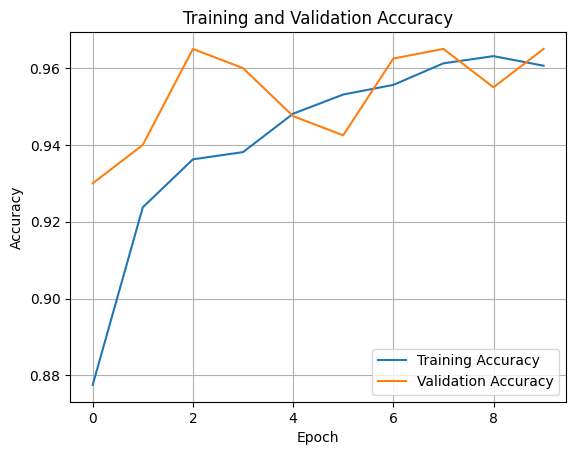

In [14]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

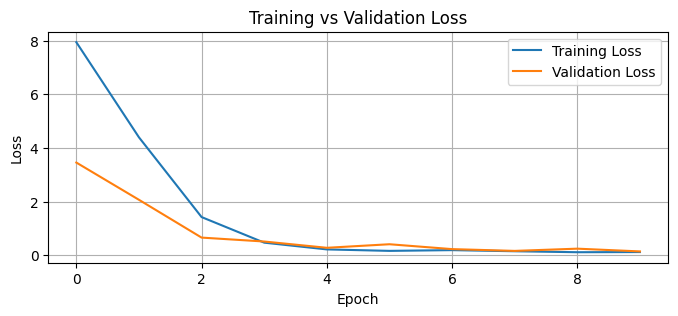

In [15]:
# plot training vs validation loss
plt.figure(figsize=(8,3))
# plt.subplots(1,2,1)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)

## **Predict New Image**

In [20]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction[0])
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[class_index]
    confidence = prediction[0][class_index] * 100

    print(f"Predicted: {predicted_label} ({confidence:.2f}%)")
    # Display image
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label}")
    plt.show()

    return predicted_label, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
Predicted: cats (100.00%)


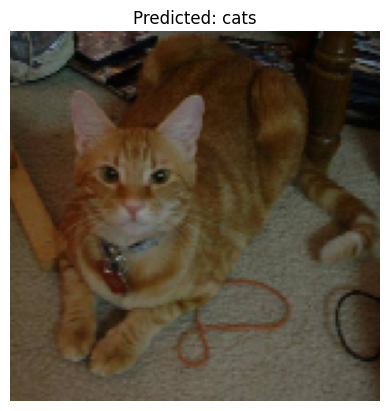

('cats', np.float32(100.0))

In [21]:
predict_image('/content/drive/MyDrive/Colab Notebooks/Cats_Dogs/cats/cat.125.jpg')